In [17]:
#Import all necessary Libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression


In [69]:
sales_data = pd.read_csv('C:/Users/user/Desktop/sales data/auto Sales data.csv')
sales_data.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [70]:
sales_data.info

<bound method DataFrame.info of       ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

       ORDERDATE  DAYS_SINCE_LASTORDER    STATUS  PRODUCTLINE  MSRP

In [71]:
# Convert the 'DATE' column to a datetime type and set it as the index
sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])
sales_data.set_index('ORDERDATE', inplace=True)

# Specify the period (e.g., monthly data with a yearly cycle)
period = 12

C:\Users\user\AppData\Local\Temp\ipykernel_2576\2544680022.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  sales_data['ORDERDATE'] = pd.to_datetime(sales_data['ORDERDATE'])


In [72]:
# Exploratory data analysis
print(sales_data.describe())  # summary statistics
print(sales_data.columns)  # column names


        ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000           2747.000000  2747.000000  
mean    3553.047583           1757.085912   100.691664  
std     1838.953901            819.280576    40.114802  
min      482.130000             42.000000    33.000000  
25%     2204.350000           1077.000000    68.000000  
50%     3184.800000        

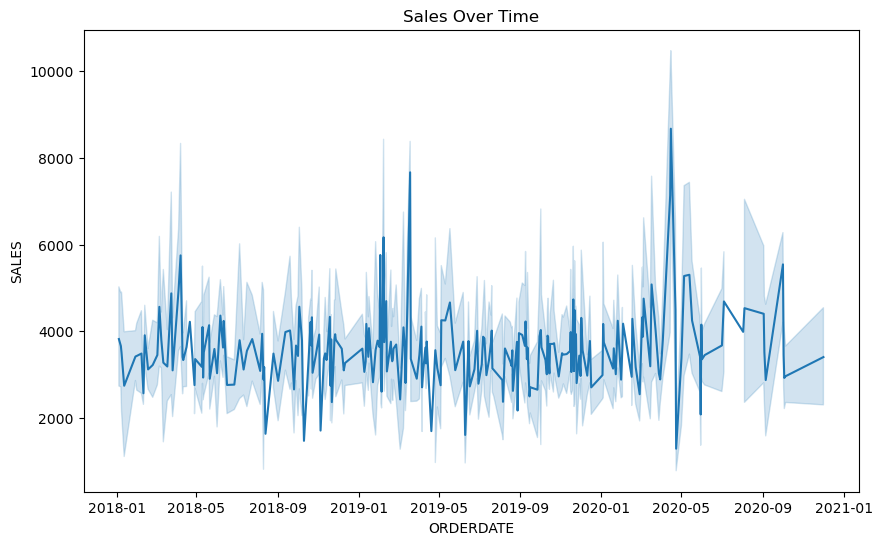

In [73]:
# Sales over time
plt.figure(figsize=(10, 6))
sns.lineplot(x="ORDERDATE", y="SALES", data=sales_data)
plt.title("Sales Over Time")
plt.show()


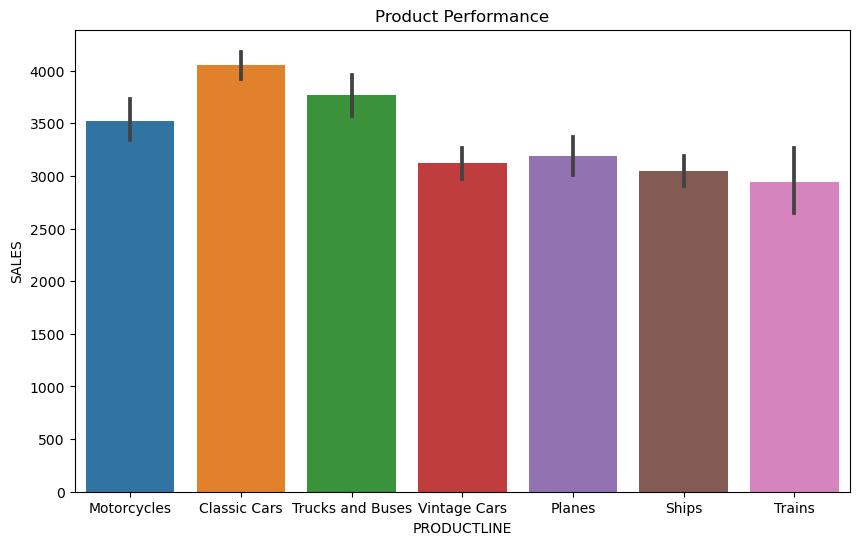

In [74]:
# Product performance
plt.figure(figsize=(10, 6))
sns.barplot(x="PRODUCTLINE", y="SALES", data=sales_data)
plt.title("Product Performance")
plt.show()


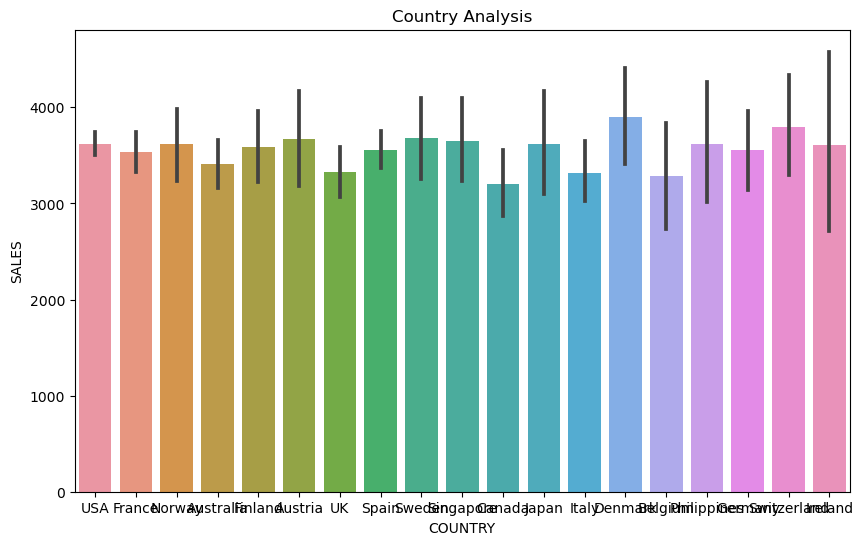

In [75]:
# Regional analysis
plt.figure(figsize=(10, 6))
sns.barplot(x="COUNTRY", y="SALES", data=sales_data)
plt.title("Country Analysis")
plt.show()


In [76]:
# Groupby analysis
sales_by_product = sales_data.groupby("PRODUCTLINE")["SALES"].sum()
print(sales_by_product)  # sales by product

sales_by_region = sales_data.groupby("COUNTRY")["SALES"].sum()
print(sales_by_region)  # sales by region

PRODUCTLINE
Classic Cars        3842868.54
Motorcycles         1103512.19
Planes               969323.42
Ships                700039.22
Trains               226243.47
Trucks and Buses    1111559.19
Vintage Cars        1806675.68
Name: SALES, dtype: float64
COUNTRY
Australia       630623.10
Austria         202062.53
Belgium         108412.62
Canada          224078.56
Denmark         245637.15
Finland         329581.91
France         1110916.52
Germany         220472.09
Ireland          57756.43
Italy           374674.31
Japan           188167.81
Norway          307463.70
Philippines      94015.73
Singapore       288488.41
Spain          1215686.92
Sweden          210014.21
Switzerland     117713.56
UK              478880.46
USA            3355575.69
Name: SALES, dtype: float64


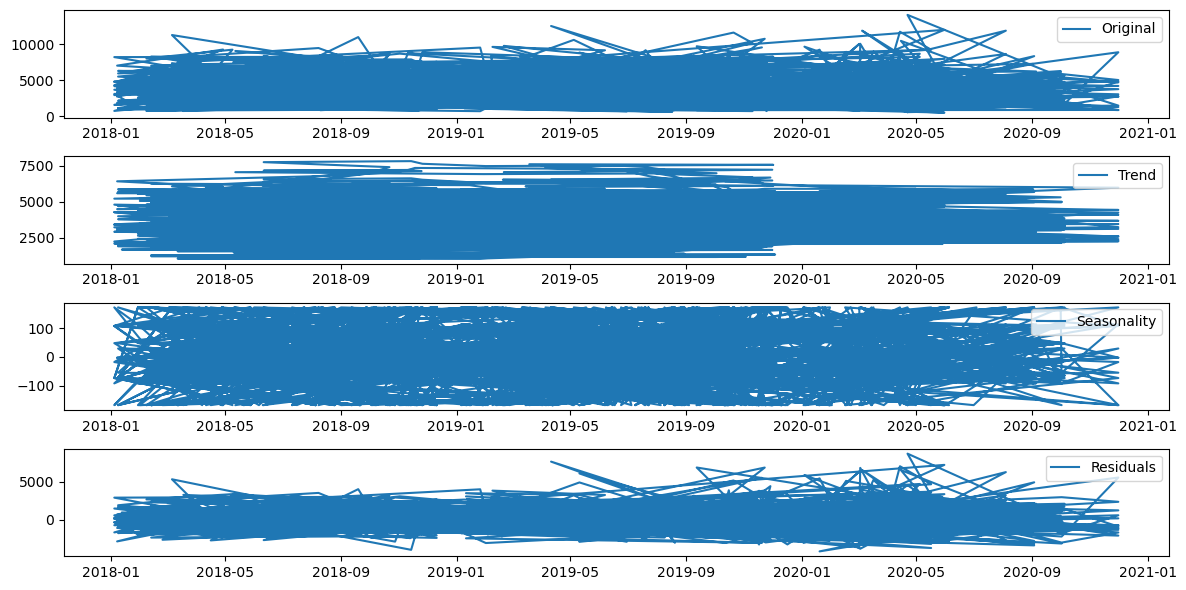

In [77]:
# Seasonal decomposition
decomposition = seasonal_decompose(sales_data["SALES"], model="additive", period=period)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(sales_data["SALES"], label="Original")
plt.legend(loc="best")
plt.subplot(412)
plt.plot(trend, label="Trend")
plt.legend(loc="best")
plt.subplot(413)
plt.plot(seasonal,label="Seasonality")
plt.legend(loc="best")
plt.subplot(414)
plt.plot(residual, label="Residuals")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [27]:
# Key performance indicators (KPIs)
total_sales = sales_data["SALES"].sum()
average_sale = sales_data["SALES"].mean()
max_sale = sales_data["SALES"].max()
min_sale = sales_data["SALES"].min()
print("Total Sales:", total_sales)
print("Average Sale:", average_sale)
print("Max Sale:", max_sale)
print("Min Sale:", min_sale)


Total Sales: 9760221.71
Average Sale: 3553.0475828176195
Max Sale: 14082.8
Min Sale: 482.13


In [29]:
# Transpose the dataframe
sales_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098952,42.042549,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [45]:
#Check the shape of the data
print(X.shape)
print(y.shape)


(2747,)
(2747,)


In [46]:
# Encoding the target variable (assuming it's categorical)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
sales_data['PRODUCTLINE'] = label_encoder.fit_transform(sales_data['PRODUCTLINE'])



In [47]:
# Feature and target
X = sales_data["SALES"].values  # Feature
y = sales_data["PRODUCTLINE"].values  # Target


In [48]:
# Reshape X to be a 2D array
X = X.reshape(-1, 1)


In [51]:
# Regression analysis
X = sales_data[["PRODUCTLINE", "PRICEEACH"]]
y = sales_data["SALES"]
model = LinearRegression()
model.fit(X, y)
print("Coefficient of determination:", model.score(X, y))
print("Coefficients:", model.coef_)

Coefficient of determination: 0.6533309989375196
Coefficients: [-1.4464905  35.33839897]


In [52]:
# Predict sales
predictions = model.predict(X)
print(predictions)


[3364.42727678 2857.32125157 3330.50241377 ... 4431.93440057 2179.11146625
 2295.02141487]
